<h1>重回帰分析 Linear Regression with Multiple Variables</h1>

例：
<img src="https://raw.githubusercontent.com/fengdu78/Coursera-ML-AndrewNg-Notes/master/images/591785837c95bca369021efa14a8bb1c.png">

<hr/>
<h1>仮定関数 (Hypothesis function)</h1>
<img src="https://camo.qiitausercontent.com/5503b461a766970521fba24b73a61bd31c8582c7/68747470733a2f2f71696974612d696d6167652d73746f72652e73332e616d617a6f6e6177732e636f6d2f302f3130323338372f35333466336264322d363636372d636666322d326532332d6363373732633831643538352e706e67">


この式は、ベクトルを用いて以下のように表す事ができる。


<img src="https://camo.qiitausercontent.com/558532a62985c3a75c906f84e37611cf2ed4c493/68747470733a2f2f71696974612d696d6167652d73746f72652e73332e616d617a6f6e6177732e636f6d2f302f3130323338372f62636532663138662d383936312d383733352d383732652d3730356439383830306234662e706e67">

※転置行列
<img width=300 src="https://camo.qiitausercontent.com/c0a6105b1602b2aeae22d353c77b21bd97edb56e/68747470733a2f2f71696974612d696d6167652d73746f72652e73332e616d617a6f6e6177732e636f6d2f302f3130323338372f39626462666438612d396165662d333235352d373436352d3637303531636165663735332e706e67">

<hr/>
<h1>コスト関数 (cost function) と最急降下法 (Gradient Descent)</h1>

<img src="https://raw.githubusercontent.com/fengdu78/Coursera-ML-AndrewNg-Notes/master/images/41797ceb7293b838a3125ba945624cf6.png">

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓

<img src="https://raw.githubusercontent.com/fengdu78/Coursera-ML-AndrewNg-Notes/master/images/6bdaff07783e37fcbb1f8765ca06b01b.png">

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓

<img src="https://raw.githubusercontent.com/fengdu78/Coursera-ML-AndrewNg-Notes/master/images/dd33179ceccbd8b0b59a5ae698847049.png">

イメージ：


<img width=500 src="https://camo.qiitausercontent.com/14a4f37a921904485b790563a83e09e0bbe0691e/68747470733a2f2f71696974612d696d6167652d73746f72652e73332e616d617a6f6e6177732e636f6d2f302f3130323338372f32653938613930342d303565622d376637612d356533302d3138633831366631313438392e706e67">

<h1>スケーリング (feature scaling)</h1>

各変数のスケールが極端に異なると、最急降下法の計算に非常に多くの時間がかかってしまう。

<img src="https://raw.githubusercontent.com/fengdu78/Coursera-ML-AndrewNg-Notes/master/images/b8167ff0926046e112acf789dba98057.png">


したがって、全ての変数にある値を乗算、除算して

-1 <= x(i) <= 1

または

-0.5 <= x(i) <= 0.5 となるよう

スケールを合わせることをフィーチャースケーリングという。


$\large x_i = \frac{x_i - mean(x)}{SD(x)}$ （$SD(x)$ は$x$の標準偏差）

或いは

$\large x_i = \frac{x_i - mean(x)}{max(x) - min(x)}$

<h1>多項式回帰</h1>

<img src="http://tkengo.github.io/assets/img/yaruo/machine-learning/linear-regression3.png">

or

<img src="http://tkengo.github.io/assets/img/yaruo/machine-learning/linear-regression7.png">


$\large f_{\theta}(x) = \theta_0 + \theta_1 x + \theta_2 x^2$


以下へ変換：

$\large x_2 =  x_1^2$

$\large f_{\theta}(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2$

※この際、x1,x2のスケールが異なってくるので、フィーチャースケーリングが必要になってくる。



In [10]:
import numpy as np
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pandas import Series,DataFrame
from matplotlib import cm

print(np.version.full_version)
print(matplotlib.__version__)
print(pd.__version__)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 6

1.15.4
2.1.1
0.23.4


In [3]:
def compute_cost(X, y, theta):
    return np.sum((np.dot(X, theta) - y) ** 2) / 2 / len(y)

In [4]:
# データの標準化
def feature_normalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X-mu)/sigma
    return X_norm, mu, sigma

In [72]:
#最急降下法
def gradient_descent(X, y, theta, alpha, num_iters):
    J_history = []
    theta_out = theta
    for i in range(num_iters):
        theta_out -= alpha / len(y) * np.dot(X.T, np.dot(X, theta_out) - y)
        J_history.append(compute_cost(X, y, theta_out))
    return theta_out, J_history

In [88]:
def init_data():
    df = pd.read_csv("./02_Linear Regression_data_01.txt", names=["population", "star","profit"])#读取数据并赋予列名
    df.head()
    X_data =  np.array(df[["population", "star"]])
    X, mu, sigma = feature_normalize(X_data)
    y =  np.array(df[["profit"]]).T[0]
    m = len(y)
    print(m)
    return [X_data, X, y, m]

In [89]:
#X_data = np.array([[2104,3],[1600,3],[2400,3],[1416,2],[3000,4],[1985,4],[1534,3],[1427,3],[1380,3],[1494,3],[1940,4],[2000,3],[1890,3],[4478,5],[1268,3],[2300,4],[1320,2],[1236,3],[2609,4],[3031,4],[1767,3],[1888,2],[1604,3],[1962,4],[3890,3],[1100,3],[1458,3],[2526,3],[2200,3],[2637,3],[1839,2],[1000,1],[2040,4],[3137,3],[1811,4],[1437,3],[1239,3],[2132,4],[4215,4],[2162,4],[1664,2],[2238,3],[2567,4],[1200,3],[852,2],[1852,4],[1203,3]])
#y = np.array([399900,329900,369000,232000,539900,299900,314900,198999,212000,242500,239999,347000,329999,699900,259900,449900,299900,199900,499998,599000,252900,255000,242900,259900,573900,249900,464500,469000,475000,299900,349900,169900,314900,579900,285900,249900,229900,345000,549000,287000,368500,329900,314000,299000,179900,299900,239500])

X_data, X, y, n = init_data()


47


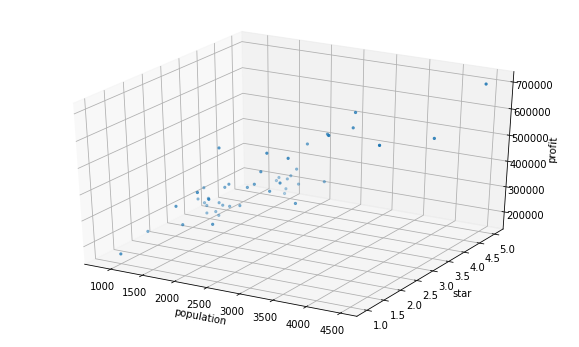

In [90]:
flg = plt.figure()
ax = flg.gca(projection='3d')    # <- axes3dをインポートしていないとエラーになる。
ax.set_xlabel('population')
ax.set_ylabel('star')
ax.set_zlabel('profit')
scatter = ax.scatter3D(X_data.T[0], X_data.T[1], y,s=5, cmap=plt.cm.viridis)    # 色のパターン
plt.show()

In [91]:

#

In [92]:
X = np.c_[np.ones(len(X)), X]
    
theta, J_history = gradient_descent(X, y, np.zeros(3), 0.01, 1500)
print(theta)

[340412.56301439 109370.05670466  -6500.61509507]


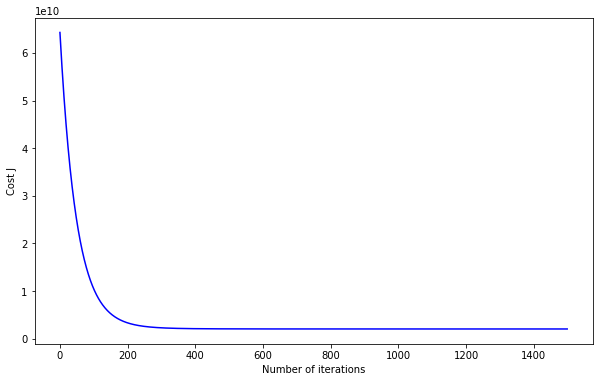

In [93]:
# 収束グラフのプロット
plt.plot(np.arange(len(J_history)), J_history, color="b")
plt.xlabel("Number of iterations")
plt.ylabel("Cost J")
plt.show()

<h2>（おすすめ1）sklearn.linear_modelのSGDRegressorを使う</h2>

In [96]:
X_data, X, y, n = init_data()
from sklearn.linear_model import SGDRegressor
print("SGDRegressor on sklearn.linear_model ...")
regr = SGDRegressor(eta0=0.01, learning_rate="constant", max_iter=400, shuffle=False)
regr.fit(X, y)
print("Intercept:", regr.intercept_)
print("Coefficients: ", regr.coef_)

47
SGDRegressor on sklearn.linear_model ...
Intercept: [339319.80384871]
Coefficients:  [106385.95873423  -7991.38807423]


<h2>（おすすめ2）sklearn.linear_modelのLinearRegressionを使う</h2>

In [95]:
X_data, X, y, n = init_data()
# Scikit-learnの組み込み最小二乗法
from sklearn.linear_model import LinearRegression
print("LinearRegression on sklearn.linear_model ...")
regr = LinearRegression(normalize=False)
regr.fit(X_data, y)
print("Intercept:", regr.intercept_) #切片（定数項）
print("Coefficients: ", regr.coef_) #xの係数

47
LinearRegression on sklearn.linear_model ...
Intercept: 89597.90954279748
Coefficients:  [  139.21067402 -8738.01911233]
